Logistic Regression Metrics: {'accuracy': 0.801277501774308, 'precision': 0.6477987421383647, 'recall': 0.5508021390374331, 'f1_score': 0.5953757225433526, 'roc_auc': 0.8432121728796921}
Random Forest Metrics: {'accuracy': 0.7927608232789212, 'precision': 0.6404109589041096, 'recall': 0.5, 'f1_score': 0.5615615615615616, 'roc_auc': 0.8290526750884808}
Decision Tree Metrics: {'accuracy': 0.7466288147622427, 'precision': 0.5225464190981433, 'recall': 0.5267379679144385, 'f1_score': 0.5246338215712384, 'roc_auc': 0.676209667002506}
XGBoost Metrics: {'accuracy': 0.8005677785663591, 'precision': 0.6534653465346535, 'recall': 0.5294117647058824, 'f1_score': 0.5849335302806499, 'roc_auc': 0.8409116742876332}


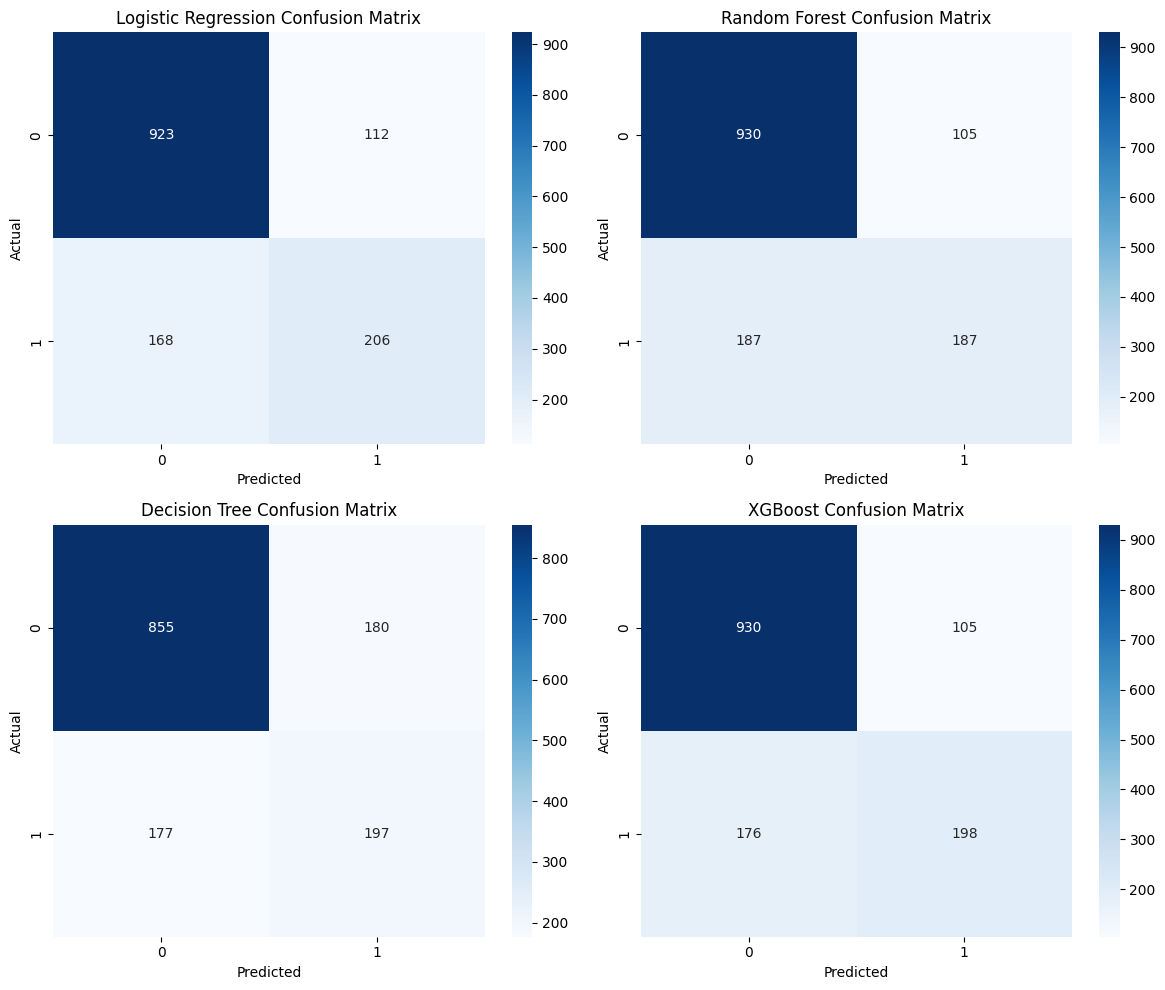

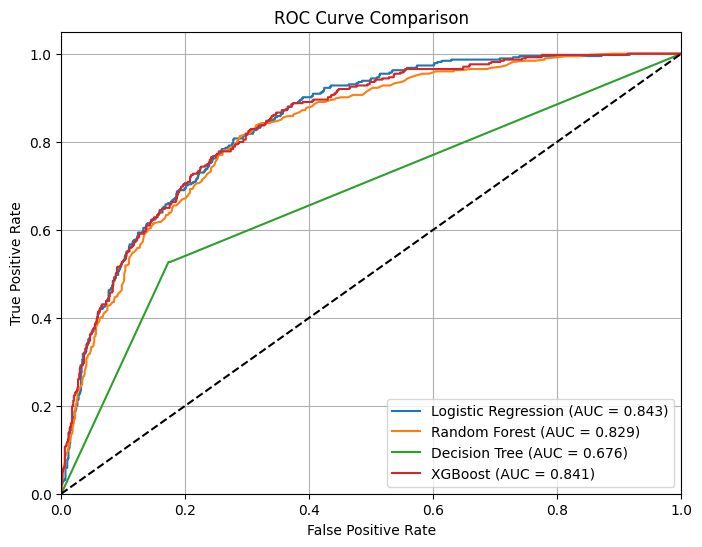

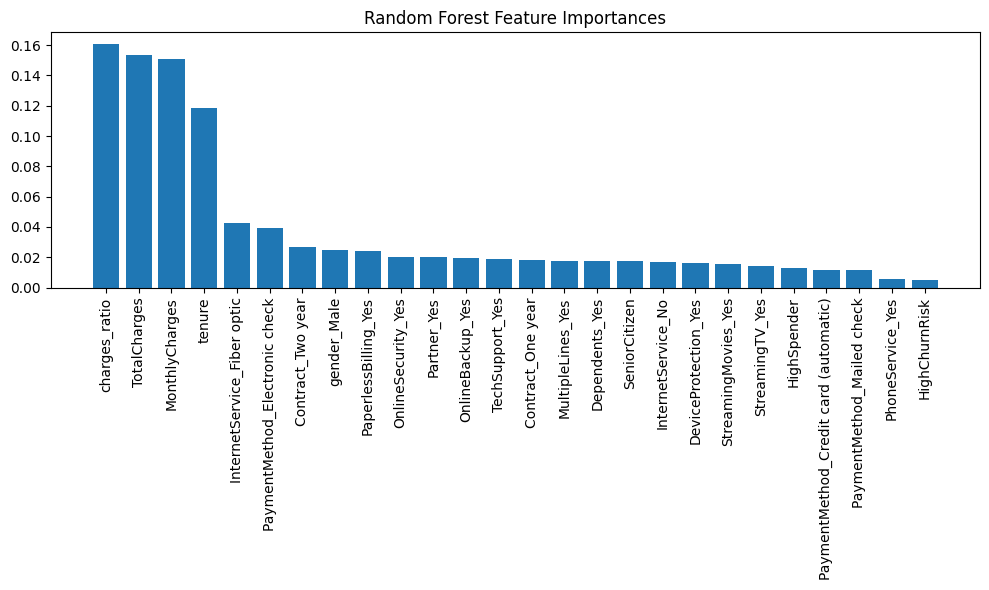

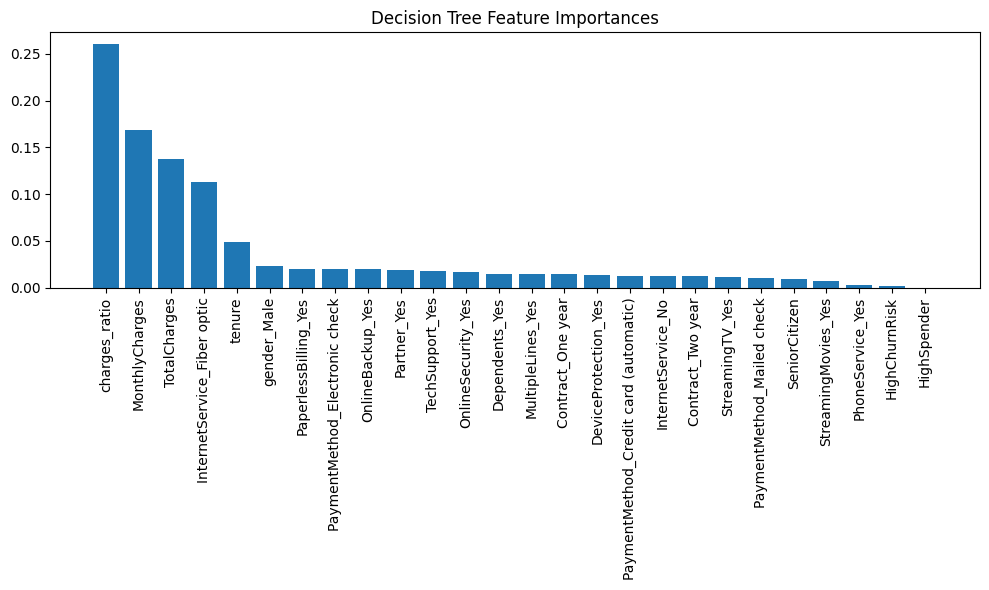

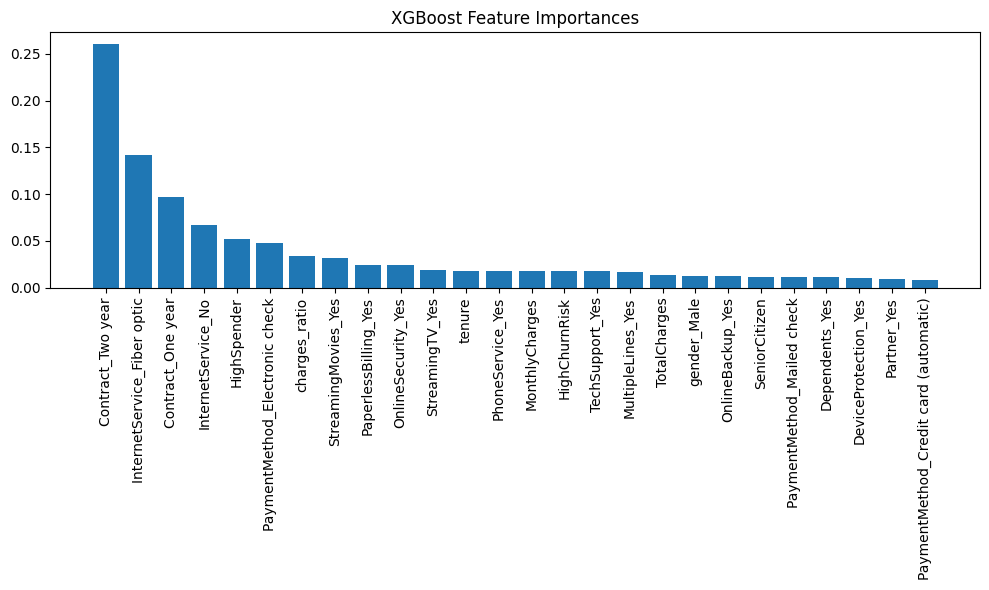

In [17]:
# model_evaluation.ipynb

import os
import sys
import joblib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc
from src.model_training import (
    evaluate_model,
    plot_confusion_matrices,
    plot_roc_curves,
    plot_feature_importance
)

# Load your processed data
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

# Load models
models_dir = os.path.join(project_root, "data", "models")
_model_files = {
    'Logistic Regression': "logistic_regression.pkl",
    'Random Forest': "random_forest.pkl",
    'Decision Tree': "decision_tree.pkl",
    'XGBoost': "xgboost.pkl"
}

models = {}
for name, fname in _model_files.items():
    model_path = os.path.join(models_dir, fname)
    if os.path.exists(model_path):
        models[name] = joblib.load(model_path)
    else:
        raise NameError(f"{name} model file not found at {model_path}. Please run the training notebook first.")

# Load the processed data for evaluation
processed_path = os.path.join(project_root, "data", "processed", "telco_churn_processed.csv")
df = pd.read_csv(processed_path)

# Prepare X (original feature DataFrame before scaling)
X = df.drop(columns=["Churn_Yes", "customerID", "tenure_group"], errors='ignore')

# If the test data was prepared previously, you can directly use it
# Assuming you have X_test and y_test already prepared, you can skip this part
# For demonstration, we will prepare the data again, but this can be adjusted
X_train, X_test, y_train, y_test = train_test_split(X, df["Churn_Yes"], test_size=0.2, random_state=42, stratify=df["Churn_Yes"])

# Evaluate models
metrics = {name: evaluate_model(model, X_test, y_test) for name, model in models.items()}

for name, metric in metrics.items():
    print(f"{name} Metrics:", metric)

# Plot Confusion Matrices
plot_confusion_matrices(models, X_test, y_test)

# Plot ROC Curves
plot_roc_curves(models, X_test, y_test)

# Plot Feature Importance for Tree-Based Models
plot_feature_importance(models, X)
